# Customer Churn Prediction Analysis

### Description

Name : K.S, SUH 
Date : 2017.08.05 KST(seoul) 08:32 AM

    
Customer churn also known as Customer turnover occurs when customers are stop doing business with a company or service from bank. Therefore, Understanding what keeps customer engageing is incredibly valuable for Banks at the moment. In the meantime,I have tried to find relevant data set about Customer churn in Banking but I could not find any publicly opened data set in banking. so, I choose a similar dataset(a longstanding telecom data )

In this notebook, you will explore a simple case study to show how Python and its scientific libraries can be used to predict churn

## PART 1. 

### Load data

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [218]:
df = pd.read_csv('churn.csv')

In [219]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [220]:
df['Churn?'].head()

0    False.
1    False.
2    False.
3    False.
4    False.
Name: Churn?, dtype: object

In [221]:
df.shape

(3333, 21)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [223]:
df.isnull().values.any()

False

#  Preprocessing Data

-  Munging

-  Transformation

-  Reduction by PCA

### Munging

In [224]:
df_features, df_labels = df.drop(['Churn?'], axis=1), df['Churn?']

In [225]:
y = np.where(df_labels == 'True.',1,0)

In [226]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [227]:
df_features = df_features.drop(['State','Area Code','Phone'],axis=1)

In [228]:
boolean_cols = ["Int'l Plan","VMail Plan"]
df_features[boolean_cols] = df_features[boolean_cols] == 'yes'

In [229]:
df_features.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [230]:

X = df_features.as_matrix().astype(np.float)

In [231]:
X

array([[ 128.  ,    0.  ,    1.  , ...,    3.  ,    2.7 ,    1.  ],
       [ 107.  ,    0.  ,    1.  , ...,    3.  ,    3.7 ,    1.  ],
       [ 137.  ,    0.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  28.  ,    0.  ,    0.  , ...,    6.  ,    3.81,    2.  ],
       [ 184.  ,    1.  ,    0.  , ...,   10.  ,    1.35,    2.  ],
       [  74.  ,    0.  ,    1.  , ...,    4.  ,    3.7 ,    0.  ]])

### Transformation

Normalize the data

In [232]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [233]:
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


## Dimension Reduction by PCA

In machine learning and statistics, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration,via obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

### PCA from Scratch

The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. In practice, the covariance (and sometimes the correlation) matrix of the data is constructed and the eigen vectors on this matrix are computed. The eigen vectors that correspond to the largest eigenvalues (the principal components) can now be used to reconstruct a large fraction of the variance of the original data. Moreover, the first few eigen vectors can often be interpreted in terms of the large-scale physical behavior of the system. The original space (with dimension of the number of points) has been reduced (with data loss, but hopefully retaining the most important variance) to the space spanned by a few eigenvectors.

In [234]:
# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)


In [235]:
# Step 1: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)
# Note that covariance matrix is 8x8 since their are 8 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[  1.00e+00   2.47e-02   2.92e-03  -4.63e-03   6.22e-03   3.85e-02
    6.22e-03  -6.76e-03   1.93e-02  -6.75e-03  -8.96e-03  -1.32e-02
   -8.96e-03   9.52e-03   2.07e-02   9.55e-03  -3.80e-03]
 [  2.47e-02   1.00e+00   6.01e-03   8.75e-03   4.94e-02   3.76e-03
    4.94e-02   1.91e-02   6.12e-03   1.91e-02  -2.89e-02   1.25e-02
   -2.89e-02   4.59e-02   1.74e-02   4.58e-02  -2.45e-02]
 [  2.92e-03   6.01e-03   1.00e+00   9.57e-01  -1.68e-03  -1.11e-02
   -1.69e-03   2.16e-02  -6.45e-03   2.16e-02   6.08e-03   1.56e-02
    6.07e-03  -1.32e-03   7.62e-03  -1.28e-03  -1.78e-02]
 [ -4.63e-03   8.75e-03   9.57e-01   1.00e+00   7.79e-04  -9.55e-03
    7.76e-04   1.76e-02  -5.87e-03   1.76e-02   7.68e-03   7.13e-03
    7.67e-03   2.86e-03   1.40e-02   2.88e-03  -1.33e-02]
 [  6.22e-03   4.94e-02  -1.68e-03   7.79e-04   1.00e+00   6.75e-03
    1.00e+00   7.04e-03   1.58e-02   7.03e-03   4.32e-03   2.30e-02
    4.30e-03  -1.02e-02   8.04e-03  -1.01e-02  -1.34e-02]
 [  3

In [236]:
# Step 2: Obtain eigenvectors and eigenvalues

# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 6x6 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 6x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ -5.97e-03   1.50e-02   7.01e-03   4.47e-03  -1.93e-02   5.90e-03
    5.81e-01  -2.25e-01  -5.96e-01   1.26e-01   2.83e-01  -2.37e-01
    3.23e-01  -1.94e-05   3.59e-06  -8.46e-06   1.48e-06]
 [  4.47e-03   7.94e-03   6.78e-02   3.84e-02  -7.40e-02  -2.12e-03
    3.25e-01   3.47e-01   3.92e-01  -1.64e-01  -3.89e-01  -2.20e-01
    6.18e-01   6.72e-05   4.68e-06  -4.42e-06  -1.54e-06]
 [ -4.87e-01  -1.71e-01   1.63e-01   4.03e-01   2.09e-01  -7.07e-01
   -3.32e-03  -2.11e-02   7.82e-04   6.77e-03   1.09e-04  -1.26e-02
   -4.10e-03  -1.33e-04  -2.10e-05   1.57e-05  -8.84e-06]
 [ -4.87e-01  -1.68e-01   1.61e-01   4.06e-01   2.06e-01   7.07e-01
   -4.82e-03  -2.50e-02   1.04e-02   8.72e-03  -4.86e-03  -3.42e-03
   -2.11e-03   1.07e-04   3.24e-05  -2.62e-05   1.06e-05]
 [ -5.25e-02  -3.18e-01   5.00e-02   9.77e-02  -6.16e-01  -9.38e-04
   -3.61e-02  -3.89e-02  -1.71e-02   1.09e-03   1.08e-02   1.82e-02
   -1.57e-02   3.14e-04   4.34e-03  -2.72e-04  -7.07e-01]
 [  1

In [237]:
# Step 3  Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.0503619781546227, 2.037929963449685, 1.9979766718000467, 1.9779944898559132, 1.9187538181855091, 1.0691435976378134, 1.0276895750473627, 1.0079315611845607, 0.9849226796561128, 0.97964434908575748, 0.96441756671493495, 0.94536879171370003, 0.042958701151754319, 7.2424033372177536e-06, 7.8349267165430604e-07, 2.2354254794100355e-07, 4.7740008952833932e-08]


Cumulative proportion of variance explained vector: 
[ 0.12  0.24  0.36  0.47  0.59  0.65  0.71  0.77  0.83  0.89  0.94  1.    1.
  1.    1.    1.    1.  ]


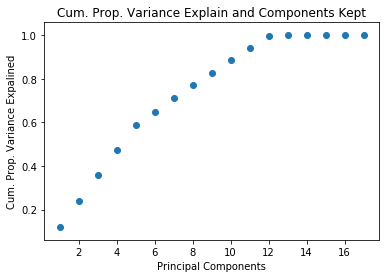

In [238]:
from matplotlib import pyplot as plt
# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)

# Chart title
plt.title('Cum. Prop. Variance Explain and Components Kept')

# x-label
plt.xlabel('Principal Components')

# y-label
plt.ylabel('Cum. Prop. Variance Expalined')

# Scatter plot of cumulative variance explained and principal components kept
plt.scatter(num_comp, var_comp_sum)

# Show scattor plot
plt.show()

Um.. Can you see that? I think I can reduce the data to 10 or 11 features.

In [239]:
# Step 4: Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:2]).transpose()

# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

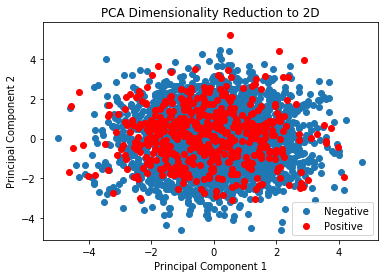

In [240]:
%matplotlib inline
# Visualize data in 2D

# Plot projected the data onto 2D (test negative for churn)
negative = plt.scatter(Proj_data_2D[:,0][y == 0], Proj_data_2D[:,1][y == 0])

# Plot projected the data onto 2D (test positive for churn)
positive = plt.scatter(Proj_data_2D[:,0][y == 1], Proj_data_2D[:,1][y == 1], color = "red")


# Chart title
plt.title('PCA Dimensionality Reduction to 2D')

# y-label
plt.ylabel('Principal Component 2')

# x-label
plt.xlabel('Principal Component 1')

# legend
plt.legend([negative,positive],["Negative", "Positive"])

# Show scatter plot
plt.show()

In [241]:
# Step 4: Project data onto 3d 

# Keep the first three principal components 
# P_reduce is k x 3 matrix
P_reduce = np.array(eigvectors_sort[0:3]).transpose()

# Let's project data onto 3D space
# The projected data in 3D will be n x 3 matrix
Proj_data_3D = np.dot(X_std,P_reduce)

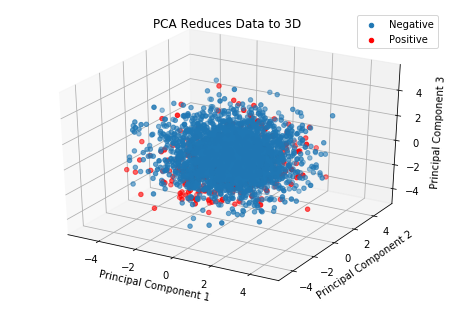

In [242]:
# Visualize data in 3D
from mpl_toolkits.mplot3d import Axes3D
# Define 3D figure
fig = plt.figure()
ax = Axes3D(fig)

# Scatter plot in 3D (test negative for churn)
negative = ax.scatter(Proj_data_3D[:,0][y == 0], Proj_data_3D[:,1][y == 0], Proj_data_3D[:,2][y == 0])

# Scatter plot in 3D (test positive for churn)
positive = ax.scatter(Proj_data_3D[:,0][y == 1], Proj_data_3D[:,1][y == 1], Proj_data_3D[:,2][y == 1], color = "red")

# Title 
ax.set_title('PCA Reduces Data to 3D')

# x-label 
ax.set_xlabel('Principal Component 1')

# y-label
ax.set_ylabel('Principal Component 2')

# z-label
ax.set_zlabel('Principal Component 3')

# legend
plt.legend([negative,positive],["Negative", "Positive"])

# Show 3D plot
plt.show()

### short cut(PCA) : with scikit-learn

In [243]:
X.shape

(3333, 17)

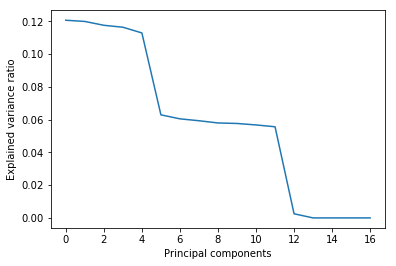

In [244]:
%matplotlib inline
#PCA In Sklearn
from sklearn.decomposition import PCA

pca_full = PCA(n_components = None)
pca_full.fit(X)

plt.plot(range(0,17), pca_full.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

In [245]:
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 11)
x_pca = pca.fit_transform(x_scaled)
print(x_pca, end = '\n\n')
print(pca.explained_variance_ratio_)

[[ 1.89 -0.34 -1.13 ..., -0.35 -0.31 -0.11]
 [-0.43 -0.26  0.81 ..., -0.78 -0.85  0.15]
 [-1.49 -0.55 -2.71 ..., -0.12 -0.96  0.21]
 ..., 
 [-0.39  2.05 -0.02 ...,  1.41  0.01  0.73]
 [ 0.77 -0.16 -1.3  ..., -0.09  2.84  1.67]
 [ 1.19  1.41 -0.34 ...,  0.76 -0.76 -0.55]]

[ 0.12  0.12  0.12  0.12  0.11  0.06  0.06  0.06  0.06  0.06  0.06]


In [246]:
sum(pca.explained_variance_ratio_)

0.9418800435497674

In [247]:
x_pca.shape

(3333, 11)

### Note:

From the above, I have concluded that It would be reasonable to use PCA to reduce the data to 11 features(dimentions) to speed up the algorithm with retaining over almost 94% of the original data variation when I decided to use classification algorithms to predict outcome.

## Building and run ML models


### Train and Test split

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

In [249]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LogisticRegression

In [250]:
from sklearn.linear_model import LogisticRegression
# Train the model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [251]:
LR_model.score(X_test, y_test)

0.85757121439280359

In [252]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = LR_model.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.556592479196


### K-Nearest Neighbors  - KNeighborsClassifier

In [253]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [254]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [255]:
knn.score(X_test, y_test)

0.90404797601199405

In [256]:
from sklearn.metrics import roc_auc_score


predictions = knn.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.665273198304


### K-Nearest Neighbors - KNeighborsRegressor

In [257]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 5)

In [258]:
knnreg.fit(X_test, y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [259]:
knnreg.score(X_test, y_test)

0.44233396137541203

In [260]:
from sklearn.metrics import roc_auc_score


predictions = knnreg.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.949864578427


### Naive Bayes classifiers

In [261]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()

In [262]:
nbclf.fit(X_test, y_test)

GaussianNB(priors=None)

In [263]:
nbclf.score(X_test, y_test)

0.8860569715142429

In [264]:
from sklearn.metrics import roc_auc_score


predictions = nbclf.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.659728764327


### Decision Trees

In [265]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0)

In [266]:
clf.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [267]:
clf.score(X_test, y_test)

0.91004497751124436

In [268]:
from sklearn.metrics import roc_auc_score


predictions = clf.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.741001334589


### Random Forests

In [269]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [270]:
clf.score(X_test, y_test)

0.90554722638680663

In [271]:
from sklearn.metrics import roc_auc_score


predictions = clf.predict(X_test)

print('AUC:', roc_auc_score(y_test, predictions))

AUC: 0.70468283875


## Manual Neural Network

- Build the Neural Network

- Set the hyperparameters, train the NN and evaluate

- Adapt SGD method to improve the accuracy

- Shorcut with Scikit-learn



In [272]:
class MyNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes =  input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.hidden_nodes,self.input_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.sigmoid_activation = lambda x : 1 / (1 + np.exp(-x))
        self.sigmoid_output_2_derivative = lambda x: x * (1 - x)
    
    def train(self, inputs_array, targets_array):
        # Convert inputs list to 2d array
        inputs  = inputs_array.T
        targets = np.array(targets_array, ndmin=2)
        #targets = targets_array
        m = inputs_array.shape[0] # number of records
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # Hidden layer
        layer_1_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        layer_1 = layer_1_inputs # signals from hidden layer
        
        # Output layer
        layer_2_inputs = np.dot(self.weights_1_2,layer_1) # signals into final output layer
        layer_2 = self.sigmoid_activation(layer_2_inputs) # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # Output error  
        layer_2_errors = targets - layer_2  # Output layer error is the difference between desired target and actual output.
        layer_2_delta = layer_2_errors * self.sigmoid_output_2_derivative(layer_2)
        
        # Backpropagated error
        layer_1_errors = np.dot(self.weights_1_2.T,layer_2_delta) # errors propagated to the hidden layer 2x128
        layer_1_delta = layer_1_errors  # hidden layer gradients y = x -> 1
        
        #  Update the weights
        self.weights_1_2 += self.lr*np.dot(layer_2_delta,layer_1.T)/m # update hidden-to-output weights with gradient descent step
        self.weights_0_1 += self.lr*np.dot(layer_1_delta,inputs.T)/m # update input-to-hidden weights with gradient descent step
         
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        #  Hidden layer
        hidden_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        hidden_outputs = hidden_inputs # signals from hidden layer
        
        # Output layer
        final_inputs = np.dot(self.weights_1_2,hidden_outputs) # signals into final output layer
        final_outputs = self.sigmoid_activation(final_inputs) # signals from final output layer 
        
        return final_outputs

### Train the model 

In [273]:
from sklearn import metrics
### Set the hyperparameters here ###
epochs = 100 #100
learning_rate = 0.01 #0.1
hidden_nodes = 10 
output_nodes = 1

N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

for e in range(epochs):
    network.train(X_train, y_train)
    
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) 
print(metrics.accuracy_score(y_test,y_pred[0]))

0.586206896552


### SGD

In [274]:

network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

random_row_idx = np.zeros(128)
for e in range(epochs):
    random_row_idx = np.random.choice(X_train.shape[0],size=128)
    X_batch = X_train[random_row_idx,:]
    y_batch = y_train[random_row_idx]
    network.train(X_batch, y_batch)

In [275]:
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0
print(metrics.accuracy_score(y_test,y_pred[0]))

0.593703148426


#### Oops! What went wrong? SGD is supposed to improve the accuracy dramatically. but the output is very disappointed though.   

###  * Pytorch-playground 

In [209]:
import torch
from torch.autograd import Variable


class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    def forward(self, input):
        """
        In the forward pass we receive a Tensor containing the input and return a
        Tensor containing the output. You can cache arbitrary Tensors for use in the
        backward pass using the save_for_backward method.
        """
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, X_train.shape[1], 100, 10

# Create random Tensors to hold input and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

# Create random Tensors for weights, and wrap them in Variables.
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Construct an instance of our MyReLU class to use in our network
    relu = MyReLU()

    # Forward pass: compute predicted y using operations on Variables; we compute
    # ReLU using our custom autograd operation.
    y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()

0 565176.5
1 541422.25
2 519423.59375
3 499031.8125
4 480082.6875
5 462449.46875
6 446006.6875
7 430658.21875
8 416312.15625
9 402893.46875
10 390310.96875
11 378502.625
12 367398.90625
13 356942.5
14 347087.3125
15 337783.9375
16 328987.71875
17 320660.0625
18 312762.53125
19 305262.96875
20 298129.84375
21 291339.4375
22 284866.53125
23 278687.96875
24 272784.53125
25 267139.03125
26 261732.515625
27 256552.953125
28 251584.453125
29 246814.609375
30 242226.265625
31 237809.75
32 233557.015625
33 229454.953125
34 225493.609375
35 221665.109375
36 217964.0625
37 214384.15625
38 210916.859375
39 207556.109375
40 204296.734375
41 201133.3125
42 198062.078125
43 195079.0
44 192178.921875
45 189356.671875
46 186608.046875
47 183926.328125
48 181313.078125
49 178766.328125
50 176284.46875
51 173864.828125
52 171503.875
53 169198.75
54 166947.109375
55 164749.546875
56 162603.703125
57 160505.796875
58 158453.9375
59 156445.75
60 154480.84375
61 152558.546875
62 150678.640625
63 148839.2187

##### * TensorFlow: Static Graphs

In [210]:
import tensorflow as tf
import numpy as np

# First we set up the computational graph:



# Create placeholders for the input and target data; these will be filled
# with real data when we execute the graph.
x = tf.placeholder(tf.float32, shape=(None, D_in))
y = tf.placeholder(tf.float32, shape=(None, D_out))

# Create Variables for the weights and initialize them with random data.
# A TensorFlow Variable persists its value across executions of the graph.
w1 = tf.Variable(tf.random_normal((D_in, H)))
w2 = tf.Variable(tf.random_normal((H, D_out)))

# Forward pass: Compute the predicted y using operations on TensorFlow Tensors.
# Note that this code does not actually perform any numeric operations; it
# merely sets up the computational graph that we will later execute.
h = tf.matmul(x, w1)
h_relu = tf.maximum(h, tf.zeros(1))
y_pred = tf.matmul(h_relu, w2)

# Compute loss using operations on TensorFlow Tensors
loss = tf.reduce_sum((y - y_pred) ** 2.0)

# Compute gradient of the loss with respect to w1 and w2.
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

# Update the weights using gradient descent. To actually update the weights
# we need to evaluate new_w1 and new_w2 when executing the graph. Note that
# in TensorFlow the the act of updating the value of the weights is part of
# the computational graph; in PyTorch this happens outside the computational
# graph.
learning_rate = 1e-6
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)

# Now we have built our computational graph, so we enter a TensorFlow session to
# actually execute the graph.
with tf.Session() as sess:
    # Run the graph once to initialize the Variables w1 and w2.
    sess.run(tf.global_variables_initializer())

    # Create numpy arrays holding the actual data for the inputs x and targets
    # y
    x_value = np.random.randn(N, D_in)
    y_value = np.random.randn(N, D_out)
    for _ in range(500):
        # Execute the graph many times. Each time it executes we want to bind
        # x_value to x and y_value to y, specified with the feed_dict argument.
        # Each time we execute the graph we want to compute the values for loss,
        # new_w1, and new_w2; the values of these Tensors are returned as numpy
        # arrays.
        loss_value, _, _ = sess.run([loss, new_w1, new_w2],
                                    feed_dict={x: x_value, y: y_value})
        print(loss_value)

396732.0
384028.0
372172.0
361087.0
350716.0
340994.0
331867.0
323289.0
315219.0
307610.0
300427.0
293636.0
287209.0
281119.0
275336.0
269834.0
264599.0
259609.0
254844.0
250290.0
245934.0
241762.0
237762.0
233921.0
230228.0
226675.0
223253.0
219953.0
216766.0
213685.0
210704.0
207819.0
205023.0
202312.0
199683.0
197130.0
194649.0
192235.0
189885.0
187595.0
185354.0
183171.0
181041.0
178963.0
176932.0
174948.0
173009.0
171112.0
169259.0
167445.0
165669.0
163929.0
162231.0
160566.0
158932.0
157330.0
155753.0
154206.0
152688.0
151196.0
149730.0
148289.0
146873.0
145482.0
144114.0
142765.0
141439.0
140135.0
138852.0
137591.0
136351.0
135129.0
133927.0
132744.0
131579.0
130431.0
129301.0
128188.0
127090.0
126008.0
124943.0
123894.0
122861.0
121842.0
120838.0
119848.0
118870.0
117905.0
116954.0
116014.0
115088.0
114174.0
113272.0
112381.0
111503.0
110636.0
109782.0
108937.0
108102.0
107278.0
106464.0
105660.0
104867.0
104086.0
103314.0
102552.0
101799.0
101057.0
100324.0
99599.2
98883.1
981

#### * PyTorch: nn

In [211]:
import torch
from torch.autograd import Variable

 

# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Variable, so
    # we can access its data and gradients like we did before.
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 706.6119384765625
1 700.4513549804688
2 694.7787475585938
3 689.5199584960938
4 684.6123046875
5 680.0064697265625
6 675.6635131835938
7 671.546142578125
8 667.6215209960938
9 663.8670654296875
10 660.2603759765625
11 656.7838134765625
12 653.4240112304688
13 650.17041015625
14 647.0122680664062
15 643.9382934570312
16 640.9409790039062
17 638.0127563476562
18 635.15185546875
19 632.3528442382812
20 629.6102294921875
21 626.9197998046875
22 624.2807006835938
23 621.6878662109375
24 619.1405029296875
25 616.6353759765625
26 614.17041015625
27 611.7435913085938
28 609.3526611328125
29 606.99755859375
30 604.6766357421875
31 602.3897705078125
32 600.1346435546875
33 597.9102783203125
34 595.7159423828125
35 593.5502319335938
36 591.4125366210938
37 589.3011474609375
38 587.2169799804688
39 585.157470703125
40 583.1214599609375
41 581.10986328125
42 579.1202392578125
43 577.1547241210938
44 575.2103881835938
45 573.2893676757812
46 571.391357421875
47 569.5134887695312
48 567.65484619140

##### * PyTorch: optim

In [212]:
import torch
from torch.autograd import Variable



# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(size_average=False)

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Variables it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable weights
    # of the model)
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

0 689.510498046875
1 688.380126953125
2 687.2571411132812
3 686.1407470703125
4 685.0306396484375
5 683.9288940429688
6 682.8330078125
7 681.744384765625
8 680.66357421875
9 679.5885620117188
10 678.521240234375
11 677.4602661132812
12 676.4073486328125
13 675.35986328125
14 674.3209838867188
15 673.287353515625
16 672.2616577148438
17 671.24365234375
18 670.2324829101562
19 669.2290649414062
20 668.2329711914062
21 667.2437133789062
22 666.2601928710938
23 665.2848510742188
24 664.3153076171875
25 663.3528442382812
26 662.3972778320312
27 661.4483642578125
28 660.50634765625
29 659.5704345703125
30 658.6415405273438
31 657.7184448242188
32 656.8020629882812
33 655.8916625976562
34 654.9871826171875
35 654.0902099609375
36 653.19970703125
37 652.3154296875
38 651.43701171875
39 650.5646362304688
40 649.6972045898438
41 648.83642578125
42 647.9808959960938
43 647.1301879882812
44 646.2852783203125
45 645.4462280273438
46 644.6118774414062
47 643.7823486328125
48 642.9588012695312
49 642

#### * PyTorch: Custom nn Modules

In [213]:
import torch
from torch.autograd import Variable


class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred



# Create random Tensors to hold inputs and outputs, and wrap them in Variables
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 724.8931884765625
1 718.2667846679688
2 712.1673583984375
3 706.515625
4 701.248779296875
5 696.30908203125
6 691.6550903320312
7 687.2486572265625
8 683.0564575195312
9 679.050537109375
10 675.2098388671875
11 671.5144653320312
12 667.9442749023438
13 664.4904174804688
14 661.1396484375
15 657.8786010742188
16 654.6986694335938
17 651.595947265625
18 648.56396484375
19 645.5969848632812
20 642.6929321289062
21 639.8453979492188
22 637.0503540039062
23 634.3073120117188
24 631.6135864257812
25 628.9634399414062
26 626.3547973632812
27 623.7824096679688
28 621.245849609375
29 618.7469482421875
30 616.2835693359375
31 613.8548583984375
32 611.4590454101562
33 609.0932006835938
34 606.7584228515625
35 604.4526977539062
36 602.1754150390625
37 599.9267578125
38 597.70458984375
39 595.5100708007812
40 593.3426513671875
41 591.2010498046875
42 589.0839233398438
43 586.9895629882812
44 584.9192504882812
45 582.8724975585938
46 580.8455810546875
47 578.841064453125
48 576.8567504882812
49 57

474 191.79232788085938
475 191.30343627929688
476 190.8157196044922
477 190.32969665527344
478 189.8426971435547
479 189.36288452148438
480 188.87771606445312
481 188.39695739746094
482 187.9172821044922
483 187.43983459472656
484 186.9615020751953
485 186.48655700683594
486 186.01348876953125
487 185.54058837890625
488 185.07025146484375
489 184.59951782226562
490 184.1300048828125
491 183.66207885742188
492 183.19815063476562
493 182.73451232910156
494 182.2716064453125
495 181.8109130859375
496 181.35147094726562
497 180.8942413330078
498 180.43618774414062
499 179.98184204101562


#### PyTorch: Control Flow + Weight Sharing

In [214]:
import random
import torch
from torch.autograd import Variable


class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 0, 1, 2, or 3
        and reuse the middle_linear Module that many times to compute hidden layer
        representations.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same Module many
        times when defining a computational graph. This is a big improvement from Lua
        Torch, where each Module could be used only once.
        """
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred




# Create random Tensors to hold inputs and outputs, and wrap them in Variables
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

# Construct our model by instantiating the class defined above
model = DynamicNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

0 631.6011352539062
1 630.90087890625
2 629.6051635742188
3 628.7706298828125
4 627.4116821289062
5 656.30126953125
6 648.0076904296875
7 632.5197143554688
8 618.9889526367188
9 620.6129760742188
10 612.6231079101562
11 624.99658203125
12 618.7490234375
13 618.4296264648438
14 618.1660766601562
15 590.886474609375
16 617.7921142578125
17 617.6082153320312
18 614.72119140625
19 614.484130859375
20 617.5092163085938
21 615.7818603515625
22 616.6520385742188
23 612.5299682617188
24 555.1008911132812
25 616.0269775390625
26 615.8042602539062
27 615.5697631835938
28 601.6702880859375
29 532.2542114257812
30 527.3704833984375
31 614.927001953125
32 609.0223999023438
33 614.704833984375
34 592.7621459960938
35 590.9089965820312
36 588.2769775390625
37 614.08251953125
38 581.9486694335938
39 496.5171813964844
40 574.916259765625
41 570.932861328125
42 486.87481689453125
43 603.3112182617188
44 479.0560302734375
45 612.0692749023438
46 551.78857421875
47 598.949462890625
48 610.65625
49 609.883

391 69.78081512451172
392 42.41629409790039
393 30.077611923217773
394 70.67196655273438
395 12.006392478942871
396 20.84347152709961
397 30.69301414489746
398 51.37990188598633
399 34.69210433959961
400 38.855430603027344
401 16.31419563293457
402 9.235649108886719
403 33.82303237915039
404 32.40725326538086
405 33.39365005493164
406 11.897923469543457
407 10.114474296569824
408 12.31532096862793
409 34.855594635009766
410 11.41730785369873
411 10.269700050354004
412 19.251306533813477
413 6.606995582580566
414 33.932884216308594
415 14.42501449584961
416 18.084964752197266
417 12.43078899383545
418 6.023278713226318
419 15.442022323608398
420 7.7223711013793945
421 28.03597068786621
422 16.694377899169922
423 23.988510131835938
424 4.950973987579346
425 12.682927131652832
426 6.878046989440918
427 11.424588203430176
428 23.117103576660156
429 10.047249794006348
430 24.500375747680664
431 26.73042869567871
432 23.603927612304688
433 10.57918930053711
434 7.551210880279541
435 10.24342

### Short cut with Scikit-learn

In [276]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler



clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs')


In [277]:
clf.fit(X_test, y_test)

MLPClassifier(activation='relu', alpha=5.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 100], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [278]:
clf.score(X_test, y_test)

0.992503748125937

## Swiching gear 

#### I now switch gears and use Neural Networks to perform customer churn analysis in Keras and Tensorflow.

### Building the model architecture

In [279]:
from keras.models import Sequential
from keras.layers import Dense
import keras

# fixing random seed
np.random.seed(0)

# create model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 11)                143       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 12        
Total params: 299.0
Trainable params: 299
Non-trainable params: 0.0
_________________________________________________________________


In [280]:
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=0)

In [281]:
scores = model.evaluate(X_train, y_train)

2528/2666 [===========================>..] - ETA: 0s

In [282]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 94.64%


In [283]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [284]:
train_predict

array([[ 0.08],
       [ 0.16],
       [ 0.04],
       ..., 
       [ 0.77],
       [ 0.01],
       [ 0.96]], dtype=float32)

In [285]:
test_predict 

array([[  2.78e-01],
       [  2.88e-02],
       [  2.67e-02],
       [  9.68e-03],
       [  1.00e+00],
       [  7.32e-01],
       [  1.47e-01],
       [  2.79e-03],
       [  4.80e-02],
       [  4.13e-02],
       [  1.77e-02],
       [  9.66e-03],
       [  1.59e-02],
       [  2.55e-03],
       [  9.03e-01],
       [  1.68e-01],
       [  1.39e-02],
       [  1.17e-01],
       [  8.49e-03],
       [  7.81e-03],
       [  6.42e-02],
       [  1.11e-02],
       [  1.67e-02],
       [  5.95e-03],
       [  7.45e-02],
       [  1.44e-02],
       [  5.64e-02],
       [  1.58e-02],
       [  3.96e-02],
       [  1.53e-01],
       [  1.88e-02],
       [  2.20e-02],
       [  2.49e-02],
       [  1.01e-02],
       [  9.64e-03],
       [  6.22e-03],
       [  9.60e-01],
       [  6.09e-03],
       [  1.87e-02],
       [  8.97e-01],
       [  2.58e-02],
       [  9.61e-01],
       [  9.94e-01],
       [  5.80e-01],
       [  2.15e-03],
       [  4.09e-03],
       [  7.33e-03],
       [  4.8

In [286]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = [0.1642291244267523, 0.94636159030817013]
testing error = [0.21547176046618099, 0.92953523327743093]


### Tensorflow

In [287]:
import tensorflow as tf
# Build one layer DNN with 40 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# Fit and predict.
classifier.fit(X_train, y_train, steps=300)
predictions = list(classifier.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(y_test, predictions)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc014a474e0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving 

/home/suh/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpb0o7dzi9/model.ckpt.
INFO:tensorflow:loss = 0.85045, step = 1
INFO:tensorflow:global_step/sec: 185.46
INFO:tensorflow:loss = 0.317136, step = 101 (0.540 sec)
INFO:tensorflow:global_step/sec: 190.504
INFO:tensorflow:loss = 0.278238, step = 201 (0.525 sec)
INFO:tensorflow:Saving checkpoints for 300 into /tmp/tmpb0o7dzi9/model.ckpt.
INFO:tensorflow:Loss for final step: 0.25708.
Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /tmp/tmpb0o7dzi9/model.ckpt-300


In [288]:
print('TF Accuracy:', score)

TF Accuracy: 0.907046476762


## Summary

- LogisticRegression : 0.85757121439280359
    
- K-Nearest Neighbors - KNeighborsClassifier : 0.90404797601199405
    
- K-Nearest Neighbors - KNeighborsRegressor : 0.44233396137541203
    
- Naive Bayes classifiers : 0.8860569715142429
    
- Decision Trees : 0.91004497751124436
    
- Random Forests : 0.90554722638680663
    
- Manual Neural Network : 0.584707646177
    
- Neural Network in Scikit-learn : 0.992503748125937
    
- Keras acc : 94.64%
    
- TF Accuracy : 0.901049475262
    

    


## PART 2. Evaluation

In [289]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not churn' 
# Positive class (1) is 'churn'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
New binary labels:	 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [290]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([2850,  483])

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.92685851318944845

## Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [292]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [293]:
dummy_majority.score(X_test, y_test)

0.86211031175059949

In [294]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.86211031175059949

## Confusion matrices


Binary (two-class) confusion matrix

In [295]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[719   0]
 [115   0]]


In [296]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.0


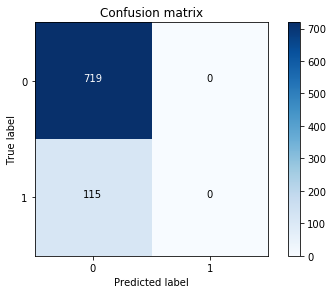

In [297]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_majority_predicted)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [298]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[599 120]
 [104  11]]


Recall metric in the testing dataset:  0.095652173913


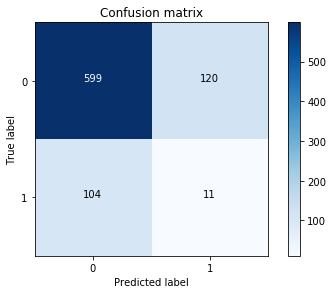

In [299]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_classprop_predicted)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [300]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[719   0]
 [115   0]]


Recall metric in the testing dataset:  0.0


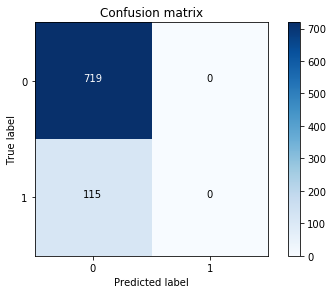

In [301]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_predicted)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [302]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[700  19]
 [ 93  22]]


Recall metric in the testing dataset:  0.191304347826


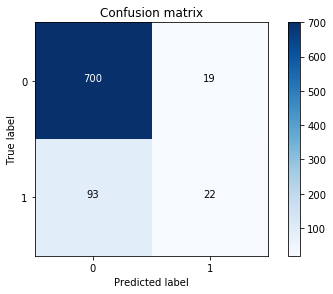

In [303]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, lr_predicted)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [304]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[671  48]
 [ 58  57]]


Recall metric in the testing dataset:  0.495652173913


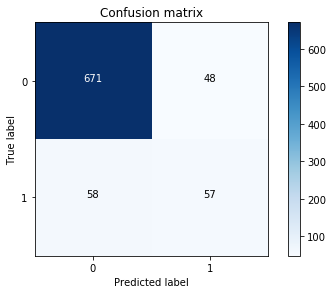

In [305]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, tree_predicted)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Evaluation metrics for binary classification

In [306]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.87
Precision: 0.54
Recall: 0.50
F1: 0.52


In [307]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.92      0.93      0.93       719
          1       0.54      0.50      0.52       115

avg / total       0.87      0.87      0.87       834



In [308]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.85      0.83      0.84       719
          1       0.08      0.10      0.09       115

avg / total       0.75      0.73      0.74       834

SVM
              precision    recall  f1-score   support

      not 1       0.86      1.00      0.93       719
          1       0.00      0.00      0.00       115

avg / total       0.74      0.86      0.80       834

Logistic regression
              precision    recall  f1-score   support

      not 1       0.88      0.97      0.93       719
          1       0.54      0.19      0.28       115

avg / total       0.83      0.87      0.84       834

Decision tree
              precision    recall  f1-score   support

      not 1       0.92      0.93      0.93       719
          1       0.54      0.50      0.52       115

avg / total       0.87      0.87      0.87       834



/home/suh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -0.35922544704334403),
 (0, -3.7323227657460532),
 (0, -0.77388071841989081),
 (0, -2.8407368879094639),
 (1, 1.6110848302407388),
 (1, 0.83317299535290923),
 (1, -0.47954398270752896),
 (0, -2.9495418637014934),
 (0, -1.7838681201333568),
 (0, -0.48210211219701016),
 (0, -3.0611665956056942),
 (0, -2.4170004900187378),
 (0, -2.1819175412057721),
 (0, -4.9295327175755972),
 (1, -1.1318048583880793),
 (0, -1.009291128645635),
 (0, -2.1100758669055097),
 (0, -1.6360379576997162),
 (0, -2.1282545676217732),
 (0, -2.8799285909984005)]

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 0.41114707629316616),
 (0, 0.023377577703215937),
 (0, 0.31564022743492104),
 (0, 0.055162119138847422),
 (1, 0.83356194636362546),
 (1, 0.69702542470295503),
 (1, 0.38235981285426651),
 (0, 0.049758168825798442),
 (0, 0.14382615648160274),
 (0, 0.38175586506309556),
 (0, 0.044737820526782227),
 (0, 0.081885476730592183),
 (0, 0.10138609297787901),
 (0, 0.0071779849125001155),
 (1, 0.24382817450315009),
 (0, 0.26711860093963496),
 (0, 0.10812135061350898),
 (0, 0.16300489956704795),
 (0, 0.10638080537391427),
 (0, 0.053154730248800998)]

## Precision-recall curves

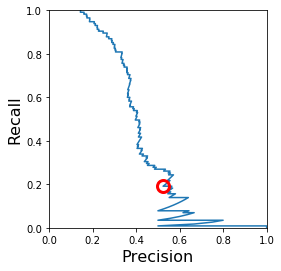

In [311]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

## ROC curves, Area-Under-Curve (AUC)

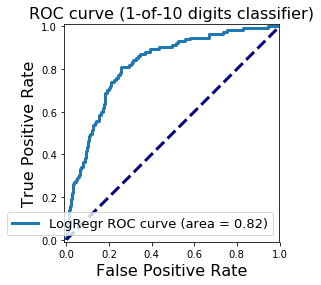

In [312]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

gamma = 0.01  accuracy = 0.89   AUC = 0.90
gamma = 0.10  accuracy = 0.92   AUC = 0.92
gamma = 0.20  accuracy = 0.90   AUC = 0.91
gamma = 1.00  accuracy = 0.86   AUC = 0.83


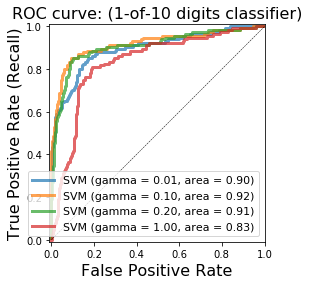

In [313]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

In [314]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [ 0.85  0.85  0.85  0.86  0.86]
Cross-validation (AUC) [ 0.71  0.66  0.76  0.62  0.59]
Cross-validation (recall) [ 0.  0.  0.  0.  0.]


## Grid search

In [315]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.05}
Grid best score (accuracy):  0.910764305722
Test set AUC:  0.91998548709
Grid best parameter (max. AUC):  {'gamma': 0.05}
Grid best score (AUC):  0.89632728614


In [316]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


# Conclusion

##### All methodology(except PCA) used in this notebook is supervised learning approach because, data set the above is some quality tagged training data.
##### So, a question raised here, what if you do not have enough quality labelled training data. 
#### In practice, getting those labelled data is not easy and it is quite expensive and time consuming process.

##### In Customer Churn Prediction problem(assuming this scenario that we know how much money they withdraw or deposit into it this month and in this case, can we predict if they will continue using the app next month or not?), If you do not have a quality labelled data, You can use unsepervised learnig algorithm like GMM (gaussian mixture model) to extract any meaningful data patterns instead.